In [1]:
from google.colab import files
upload=files.upload()

Saving weatherHistory.csv to weatherHistory.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import matplotlib.pyplot as plt
import os

In [3]:
weather = pd.read_csv("weatherHistory.csv")
weather
weather.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


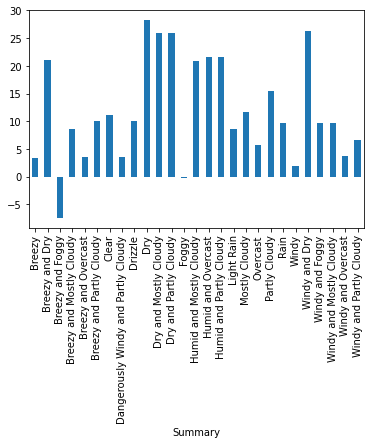

In [4]:
weather.groupby('Summary').mean()["Apparent Temperature (C)"].plot(kind='bar')

In [5]:
weather[weather["Summary"] == "Dry"].mean()

Temperature (C)               29.083660
Apparent Temperature (C)      28.273529
Humidity                       0.230294
Wind Speed (km/h)             14.713979
Wind Bearing (degrees)       230.294118
Visibility (km)               10.250965
Loud Cover                     0.000000
Pressure (millibars)        1016.391765
dtype: float64

In [6]:
def convert_summary(col):
    return len(col)

In [7]:
# Need to find the Apparent temperature when humidity given
weather_temp = weather[["Humidity","Apparent Temperature (C)"]]
#weather_temp["Summary"] = weather["Summary"].apply(convert_summary) 
weather_temp.head(12)

,Humidity,Apparent Temperature (C)
0,0.89,7.388889
1,0.86,7.227778
2,0.89,9.377778
3,0.83,5.944444
4,0.83,6.977778
5,0.85,7.111111
6,0.95,5.522222
7,0.89,6.527778
8,0.82,10.822222
9,0.72,13.772222


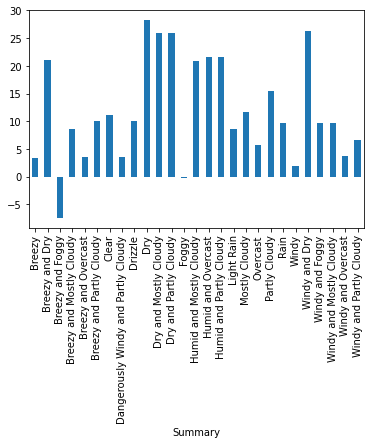

In [8]:
weather.groupby('Summary').mean()["Apparent Temperature (C)"].plot(kind='bar')

In [9]:
dummies = pd.get_dummies(weather["Summary"])
dummies.head(122)

,Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,Dry and Mostly Cloudy,Dry and Partly Cloudy,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
118,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
119,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [10]:
weather_temp2 = pd.concat([weather_temp,dummies],axis=1)
weather_temp2.head(12)

,Humidity,Apparent Temperature (C),Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,Dry and Mostly Cloudy,Dry and Partly Cloudy,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0.89,7.388889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.86,7.227778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.89,9.377778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.83,5.944444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.83,6.977778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0.85,7.111111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,0.95,5.522222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0.89,6.527778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,0.82,10.822222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0.72,13.772222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [11]:
#  Spliting X (Independent Variables) and Y(predicting variable)

y = weather_temp["Apparent Temperature (C)"]
X = weather_temp2

In [12]:
# making Two dimensional array
#X = X.reshape(-1,1)
X

,Humidity,Apparent Temperature (C),Breezy,Breezy and Dry,Breezy and Foggy,Breezy and Mostly Cloudy,Breezy and Overcast,Breezy and Partly Cloudy,Clear,Dangerously Windy and Partly Cloudy,Drizzle,Dry,Dry and Mostly Cloudy,Dry and Partly Cloudy,Foggy,Humid and Mostly Cloudy,Humid and Overcast,Humid and Partly Cloudy,Light Rain,Mostly Cloudy,Overcast,Partly Cloudy,Rain,Windy,Windy and Dry,Windy and Foggy,Windy and Mostly Cloudy,Windy and Overcast,Windy and Partly Cloudy
0,0.89,7.388889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0.86,7.227778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0.89,9.377778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.83,5.944444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.83,6.977778,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96448,0.43,26.016667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96449,0.48,24.583333,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96450,0.56,22.038889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
96451,0.60,21.522222,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
y

0         7.388889
1         7.227778
2         9.377778
3         5.944444
4         6.977778
           ...    
96448    26.016667
96449    24.583333
96450    22.038889
96451    21.522222
96452    20.438889
Name: Apparent Temperature (C), Length: 96453, dtype: float64

In [14]:
# Normalizing the X variables 
# check the x values should be between (-3  3)
#X.dropna()
x = (X >=0)
x.sum()
# prints the zero humidity
print(x.sum(),X.shape)
non_zero_humidity = X >= 0
print(non_zero_humidity.sum())

Humidity                               96453
Apparent Temperature (C)               78450
Breezy                                 96453
Breezy and Dry                         96453
Breezy and Foggy                       96453
Breezy and Mostly Cloudy               96453
Breezy and Overcast                    96453
Breezy and Partly Cloudy               96453
Clear                                  96453
Dangerously Windy and Partly Cloudy    96453
Drizzle                                96453
Dry                                    96453
Dry and Mostly Cloudy                  96453
Dry and Partly Cloudy                  96453
Foggy                                  96453
Humid and Mostly Cloudy                96453
Humid and Overcast                     96453
Humid and Partly Cloudy                96453
Light Rain                             96453
Mostly Cloudy                          96453
Overcast                               96453
Partly Cloudy                          96453
Rain      

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [16]:
X_train.shape, y_train.shape

((67517, 29), (67517,))

In [17]:
#print(X_train.head(10))
y_train.head(10)

63821    -3.894444
12372     7.088889
83717    15.966667
37705     3.783333
36742   -12.688889
63122    -5.494444
3408     -3.116667
314       8.850000
87719    10.361111
10977     3.072222
Name: Apparent Temperature (C), dtype: float64

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
X_train.shape,y_train.shape

((67517, 29), (67517,))

Text(0, 0.5, 'temperature')

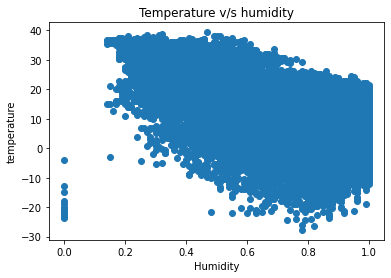

In [20]:
plt.scatter(X_train["Humidity"], y_train)
#plt.plot(X_train["Humidity"], model.predict(X_train["Humidity"]), color='black')
plt.title("Temperature v/s humidity")
plt.xlabel("Humidity")
plt.ylabel("temperature")

In [21]:
pred = model.predict(X_test)
pred


array([ 1.45      , 19.93333333, -1.01111111, ...,  1.73333333,
       -1.14444444, 13.88888889])

In [22]:
y_predict = model.predict(X_test)

In [23]:
y_pred = y_predict.reshape(1,-1)
y_pred

array([[ 1.45      , 19.93333333, -1.01111111, ...,  1.73333333,
        -1.14444444, 13.88888889]])

In [24]:
y_test.head()

18125     1.450000
92035    19.933333
59334    -1.011111
43530    21.133333
41749    14.927778
Name: Apparent Temperature (C), dtype: float64

Text(0, 0.5, 'temperature')

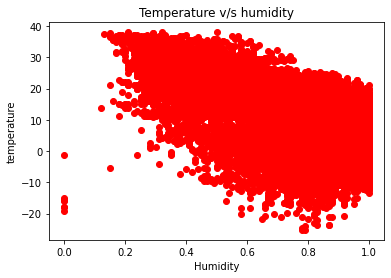

In [25]:
plt.scatter(X_test["Humidity"],y_predict,color='red')
#plt.plot(X_test["Humidity"],y_predict)
plt.title("Temperature v/s humidity")
plt.xlabel("Humidity")
plt.ylabel("temperature")

Text(0, 0.5, 'temperature')

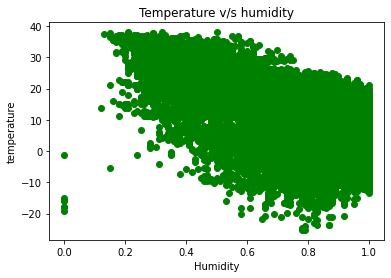

In [26]:
plt.scatter(X_test["Humidity"],y_test,color="green")
#plt.plot(X_test,y_test)
#X_test.shape
plt.title("Temperature v/s humidity")
plt.xlabel("Humidity")
plt.ylabel("temperature")

In [27]:
test = pd.DataFrame(y_test)
test["y_predict"]= 0
test["y_predict"] = y_predict
test.head(20)

,Apparent Temperature (C),y_predict
18125,1.450000,1.450000
92035,19.933333,19.933333
59334,-1.011111,-1.011111
43530,21.133333,21.133333
41749,14.927778,14.927778
63994,3.472222,3.472222
57857,12.222222,12.222222
89918,1.966667,1.966667
10172,24.022222,24.022222
76006,11.905556,11.905556


In [28]:
weather.iloc[3703]

Formatted Date              2006-07-12 07:00:00.000 +0200
Summary                                     Partly Cloudy
Precip Type                                          rain
Temperature (C)                                   21.0222
Apparent Temperature (C)                          21.0222
Humidity                                              0.8
Wind Speed (km/h)                                  3.1234
Wind Bearing (degrees)                                127
Visibility (km)                                    9.9015
Loud Cover                                              0
Pressure (millibars)                              1020.42
Daily Summary                  Partly cloudy until night.
Name: 3703, dtype: object

In [29]:
from sklearn.metrics import explained_variance_score
variance = explained_variance_score(y_test,y_predict, multioutput='uniform_average')
variance

1.0